In [3]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase
import matplotlib as mpl

from matgraphdb.database.neo4j import USER,PASSWORD,LOCATION,DB_NAME
from matgraphdb.utils import PROJECT_DIR

In [6]:
def plot_graph(session,weight_name='weight',node_size=1600,font_size=12,edge_width=1,save=False):
    # Fetch data
    data = session.run(f"""
    MATCH (a)-[r:CONNECTS]-(b)
    RETURN a.name, b.name, r.{weight_name}
    """).data()

    # Create a NetworkX graph
    G = nx.Graph()
    for row in data:
        G.add_edge(row['a.name'], row['b.name'], weight=row[f'r.{weight_name}'])

    # Draw graph
    edge_colors = [d[weight_name] for _, _, d in G.edges(data=True)]
    nx.draw(G, with_labels=True, edge_color=edge_colors, edge_cmap=plt.cm.Blues)
    plt.show()

KeyboardInterrupt: 

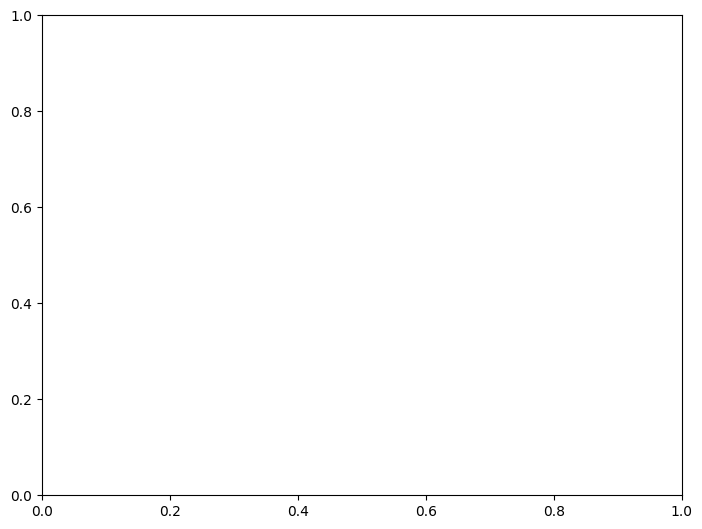

In [7]:
# This statement Connects to the database server
connection = GraphDatabase.driver(LOCATION, auth=(USER, PASSWORD))
# To read and write to the data base you must open a session
session = connection.session(database=DB_NAME)

plot_graph(session=session,weight_name='weight')

session.close()
connection.close()

In [30]:
def plot_node_and_connections(session, center_name, center_class, edge_name, edge_type, weight_name='weight', use_weights_for_thickness=True,
                              filename=None, figsize=(12, 12), node_size=800, node_spacing=3, font_size=12):
    execute_statement = 'MATCH (center:' + f'{center_class} ' + "{name: " + f"'{center_name}'" + "})"
    execute_statement += f"-[r:{edge_name} {{type:'{edge_type}'}}]-(surrounding)\n"
    execute_statement += "WHERE NOT center = surrounding\n"  # Exclude self-connections
    execute_statement += f"RETURN center.name, surrounding.name, r.{weight_name}"
    execute_statement += f" ORDER BY r.{weight_name} DESC"  # Sort by weight in descending order

    data = session.run(execute_statement).data()

    # Create a NetworkX graph
    G = nx.Graph()
    for row in data:
        G.add_edge(row['center.name'], row['surrounding.name'], weight=row[f'r.{weight_name}'])

    # Print top 10 relationships by weight
    top_10_relationships = sorted(data, key=lambda x: x[f'r.{weight_name}'], reverse=True)[:10]
    for i, relationship in enumerate(top_10_relationships):
        print(f"Relationship {i+1}: {relationship['center.name']} - {relationship['surrounding.name']}, Weight: {relationship[f'r.{weight_name}']}")

    # Draw graph
    edge_colors = [d['weight'] for _, _, d in G.edges(data=True)]

    if use_weights_for_thickness:
        edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]
    else:
        edge_widths = None

    min_width = min(edge_widths)
    max_width = max(edge_widths)

    normalized_edge_widths = [1 + 9 * ((w - min_width) / (max_width - min_width)) for w in edge_widths]

    plt.figure(figsize=figsize)

    # Use spring layout
    pos = nx.spring_layout(G, k=node_spacing)  # k adjusts the optimal distance between nodes. Play around with it.

    edge_labels = nx.get_edge_attributes(G, 'weight')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels,verticalalignment='top')

    nx.draw(G, pos=pos, with_labels=True, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=normalized_edge_widths,
            node_size=node_size, font_size=font_size, style='dashed')

    if filename:
        plt.savefig(filename)
    else:
        plt.show()

Relationship 1: Ti - O, Weight: 32.52787062819701
Relationship 2: Ti - Sn, Weight: 19.56138397727273
Relationship 3: Ti - Ni, Weight: 14.9087166666666
Relationship 4: Ti - Pd, Weight: 14.405897499999941
Relationship 5: Ti - Al, Weight: 12.60457499999996
Relationship 6: Ti - C, Weight: 11.991495512820464
Relationship 7: Ti - Ga, Weight: 10.349267499999991
Relationship 8: Ti - Cu, Weight: 9.831892142857102
Relationship 9: Ti - P, Weight: 9.41467849927851
Relationship 10: Ti - Pt, Weight: 7.553918749999992


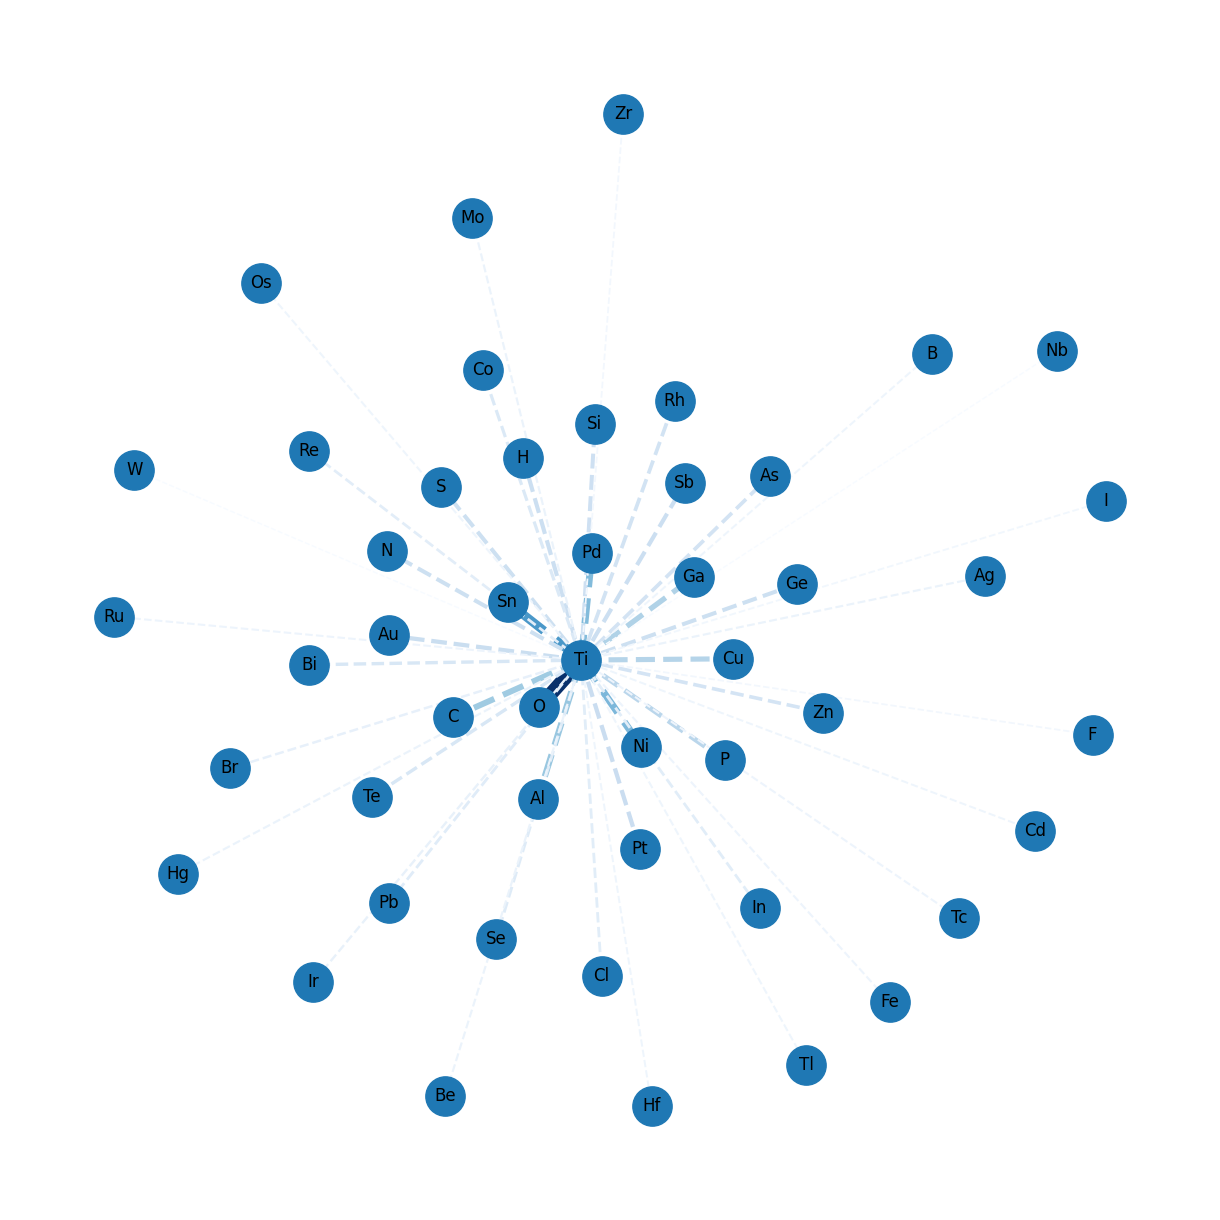

In [129]:
center_class='Element'


plot_node_and_connections(session,center_name='Ti',
                              center_class=center_class,
                              edge_name='CONNECTS', 
                              edge_type=f'Element-{center_class}',
                              weight_name='bond_order_sum',
                              node_spacing=1,)


Relationship 1: C - Si, Weight: 29.2439257010252
Relationship 2: C - O, Weight: 15.632833333333302
Relationship 3: C - Ti, Weight: 11.991495512820464
Relationship 4: C - Nb, Weight: 9.123077094474173
Relationship 5: C - Th, Weight: 8.945131428571422
Relationship 6: C - Ho, Weight: 7.885863686868707
Relationship 7: C - V, Weight: 6.910588636363629
Relationship 8: C - Ta, Weight: 6.289264999999995
Relationship 9: C - Mn, Weight: 5.999952703201961
Relationship 10: C - Cr, Weight: 5.941257500000019


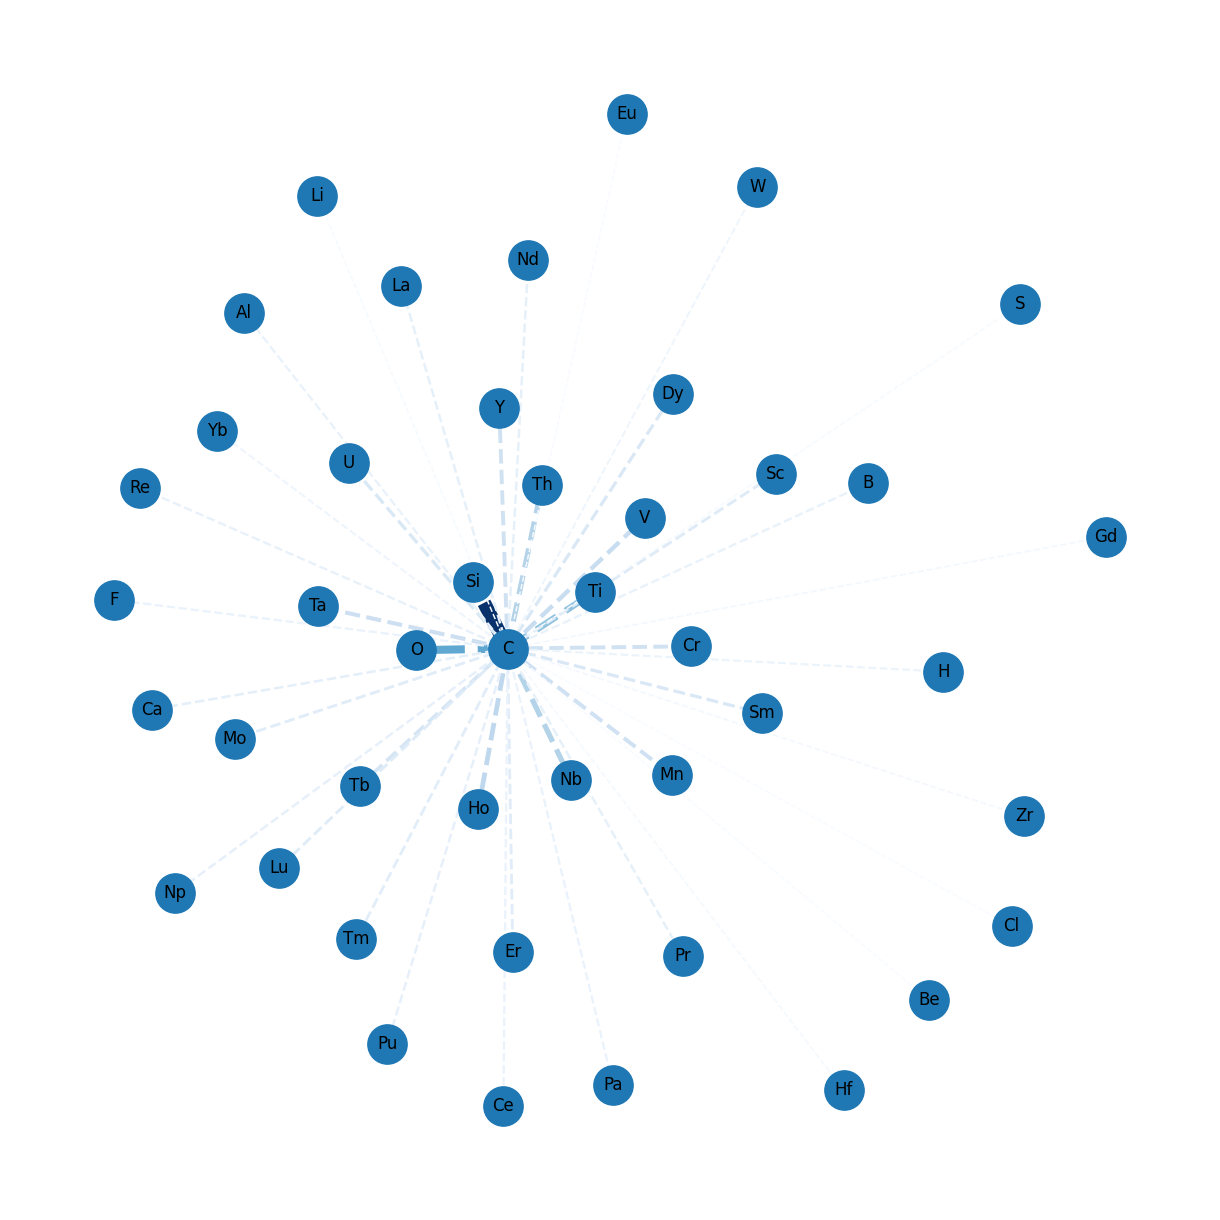

Relationship 1: C - Si, Weight: 2903
Relationship 2: C - Mn, Weight: 1091
Relationship 3: C - Ti, Weight: 840
Relationship 4: C - Ho, Weight: 816
Relationship 5: C - Y, Weight: 809
Relationship 6: C - Cr, Weight: 764
Relationship 7: C - Th, Weight: 572
Relationship 8: C - Nb, Weight: 544
Relationship 9: C - Tb, Weight: 540
Relationship 10: C - O, Weight: 528


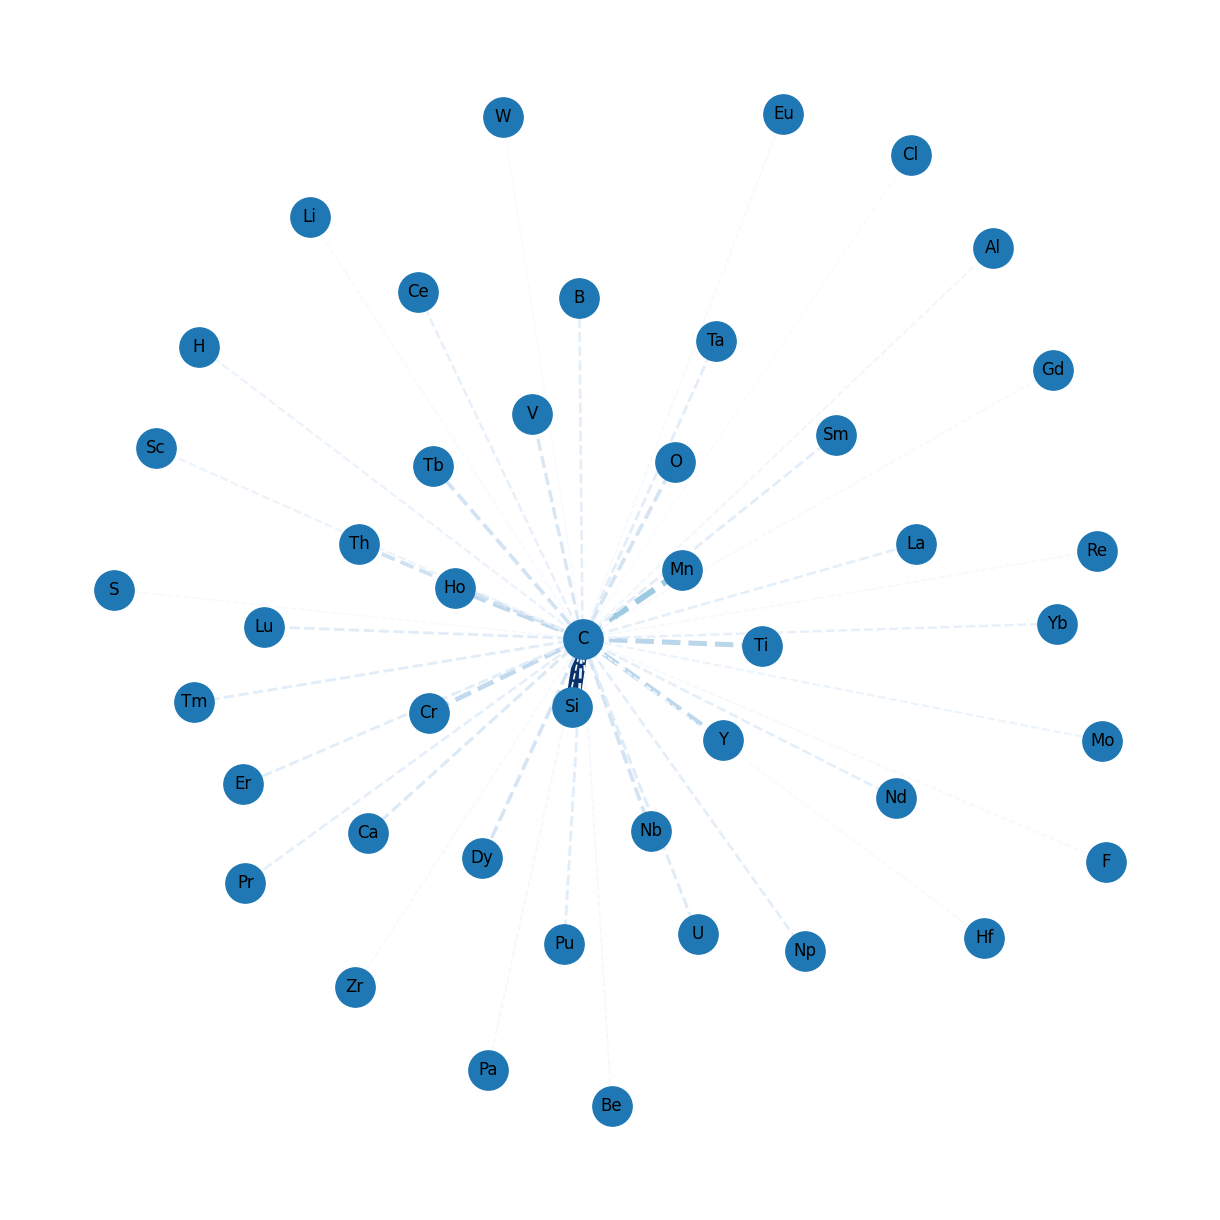

In [128]:
center_class='Element'


plot_node_and_connections(session,center_name='C',
                              center_class=center_class,
                              edge_name='CONNECTS', 
                              edge_type=f'Element-{center_class}',
                              weight_name='bond_order_sum',
                              node_spacing=1,)


plot_node_and_connections(session,center_name='C',
                              center_class=center_class,
                              edge_name='CONNECTS', 
                              edge_type=f'Element-{center_class}',
                              weight_name='weight',
                              node_spacing=5,)

Relationship 1: O_6 - T_4, Weight: 248.24012229376535
Relationship 2: O_6 - TY_3, Weight: 125.96389342929339
Relationship 3: O_6 - A_2, Weight: 121.68737349120785
Relationship 4: O_6 - SS_4, Weight: 96.1911565760472
Relationship 5: O_6 - TL_3, Weight: 89.82132440329235
Relationship 6: O_6 - S_1, Weight: 74.58138185837245
Relationship 7: O_6 - L_2, Weight: 46.75661354664799
Relationship 8: O_6 - S_5, Weight: 40.805312435654905
Relationship 9: O_6 - T_6, Weight: 39.67512928866121
Relationship 10: O_6 - TC_9, Weight: 25.642076136363606


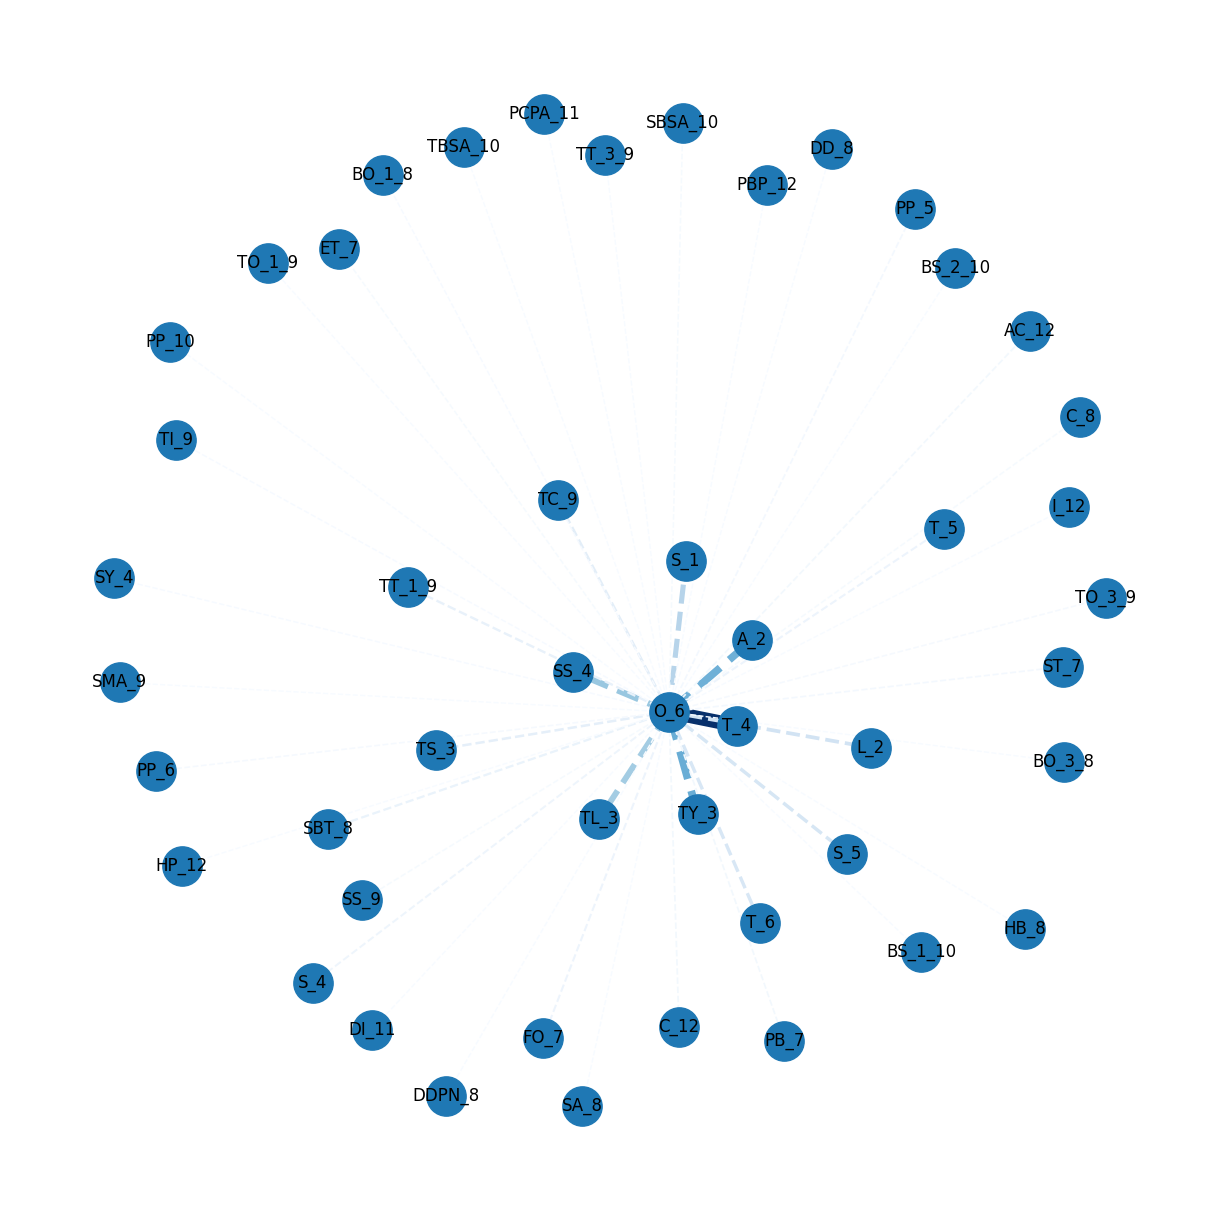

Relationship 1: O_6 - T_4, Weight: 20712
Relationship 2: O_6 - TY_3, Weight: 9421
Relationship 3: O_6 - SS_4, Weight: 7608
Relationship 4: O_6 - TL_3, Weight: 7313
Relationship 5: O_6 - A_2, Weight: 6837
Relationship 6: O_6 - S_1, Weight: 4988
Relationship 7: O_6 - S_5, Weight: 4019
Relationship 8: O_6 - L_2, Weight: 2747
Relationship 9: O_6 - T_6, Weight: 2551
Relationship 10: O_6 - TT_1_9, Weight: 1670


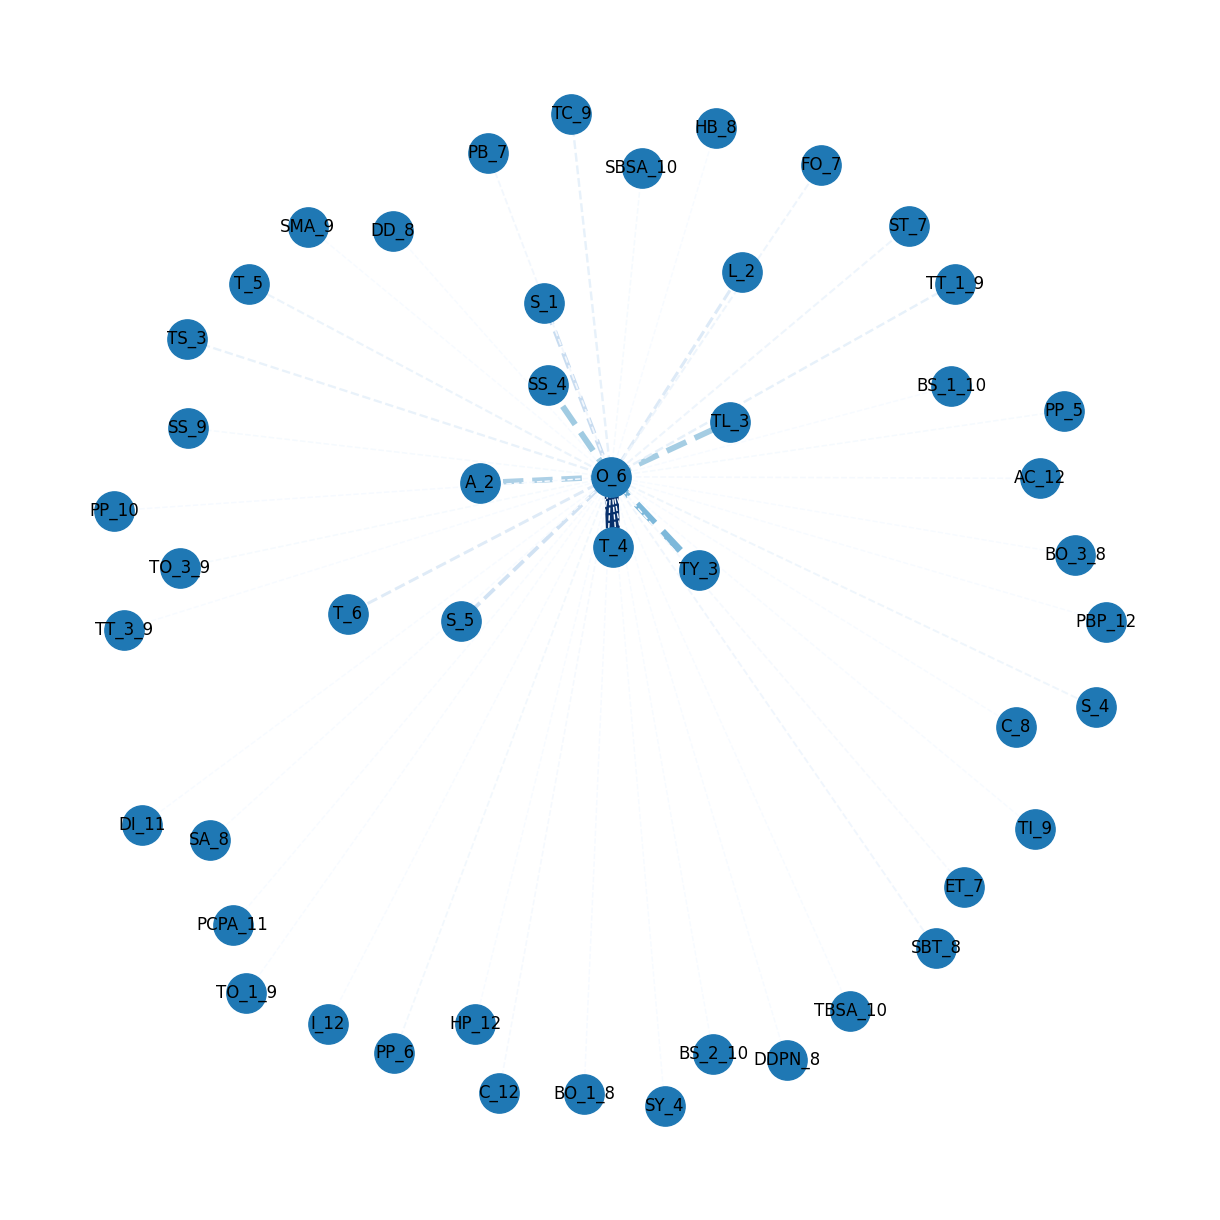

In [31]:
center_class='chemenv'


plot_node_and_connections(session,center_name='O_6',
                              center_class=center_class,
                              edge_name='CONNECTS', 
                              edge_type=f'chemenv-{center_class}',
                              weight_name='bond_order_sum',
                              node_spacing=2,)


plot_node_and_connections(session,center_name='O_6',
                              center_class=center_class,
                              edge_name='CONNECTS', 
                              edge_type=f'chemenv-{center_class}',
                              weight_name='weight',
                              node_spacing=10,)

Relationship 1: C_O_6 - Ti_TY_3, Weight: 9.371353974358955
Relationship 2: C_O_6 - Ta_O_6, Weight: 5.289795000000001
Relationship 3: C_O_6 - C_S_1, Weight: 3.421320202020207
Relationship 4: C_O_6 - Th_O_6, Weight: 3.0945857142857194
Relationship 5: C_O_6 - Nb_S_5, Weight: 2.8079604278074872
Relationship 6: C_O_6 - V_O_6, Weight: 2.7828
Relationship 7: C_O_6 - V_T_4, Weight: 2.58155833333334
Relationship 8: C_O_6 - Sc_TY_3, Weight: 2.3055
Relationship 9: C_O_6 - Mo_T_4, Weight: 2.257783333333333
Relationship 10: C_O_6 - Nb_O_6, Weight: 2.2421000000000015


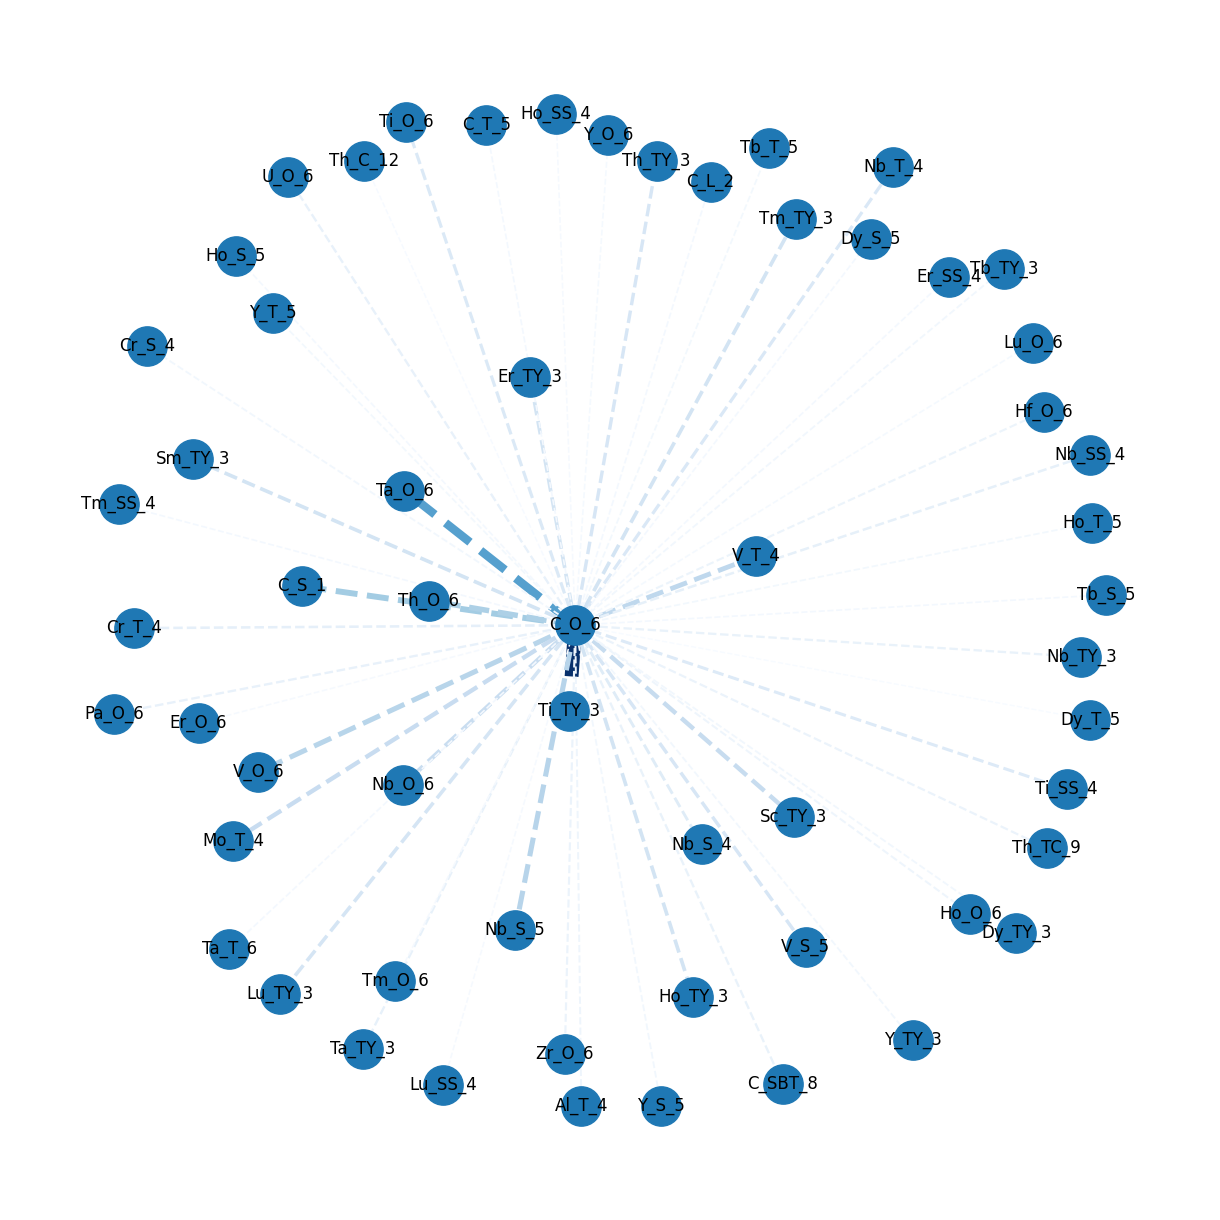

Relationship 1: C_O_6 - Ti_TY_3, Weight: 548
Relationship 2: C_O_6 - C_S_1, Weight: 520
Relationship 3: C_O_6 - V_T_4, Weight: 208
Relationship 4: C_O_6 - Ta_O_6, Weight: 208
Relationship 5: C_O_6 - V_S_5, Weight: 202
Relationship 6: C_O_6 - Nb_S_5, Weight: 176
Relationship 7: C_O_6 - Ti_SS_4, Weight: 164
Relationship 8: C_O_6 - Th_O_6, Weight: 160
Relationship 9: C_O_6 - C_L_2, Weight: 152
Relationship 10: C_O_6 - Mo_T_4, Weight: 144


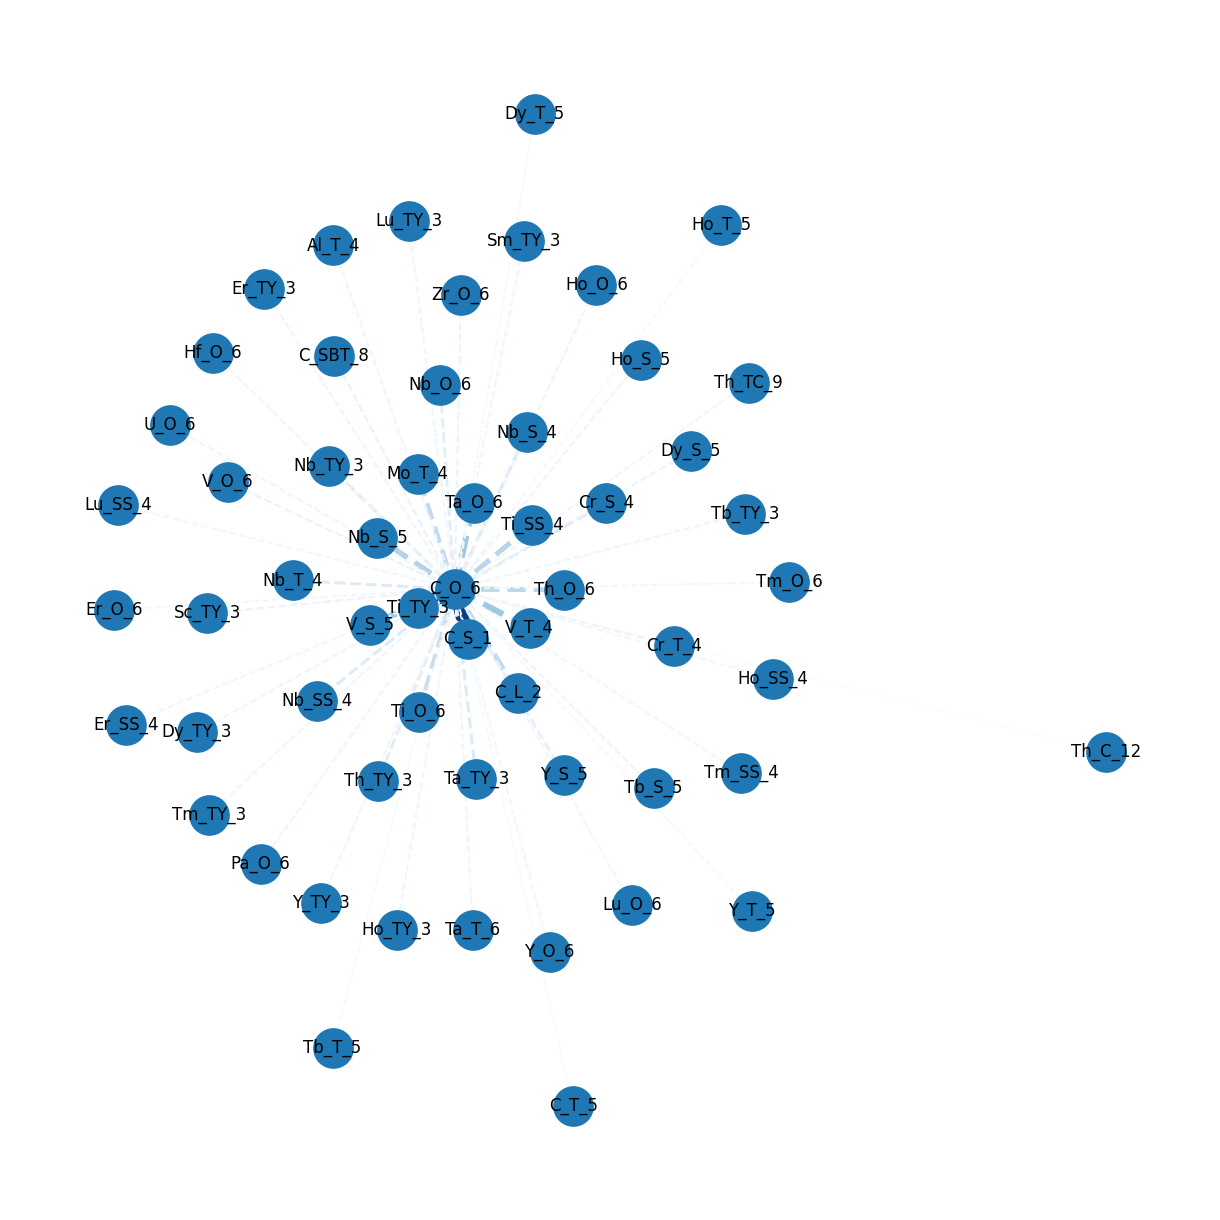

In [34]:
center_class='chemenvElement'


plot_node_and_connections(session,center_name='C_O_6',
                              center_class=center_class,
                              edge_name='CONNECTS', 
                              edge_type=f'chemenvElement-{center_class}',
                              weight_name='bond_order_sum',
                              node_spacing=1,)

plot_node_and_connections(session,center_name='C_O_6',
                              center_class=center_class,
                              edge_name='CONNECTS', 
                              edge_type=f'chemenvElement-{center_class}',
                              weight_name='weight',
                              node_spacing=1,)


In [116]:
def plot_graph(session, node_name='chemenv', weight_name='weight', limit=300, node_size=1600, font_size=12, edge_width=1, node_spacing=3, fig_size=(12, 12), save=False):
    # Fetch data
    data = session.run(f"""
    MATCH (a :{node_name})-[r:CONNECTS]-(b:{node_name})
    WHERE NOT a = b
    RETURN a.name, b.name, r.{weight_name}
    ORDER BY r.{weight_name} DESC
    LIMIT {limit}
    """).data()
    # Print top 10 relationships by weight
    top_10_relationships = sorted(data, key=lambda x: x[f'r.{weight_name}'], reverse=True)[:50]
    for i, relationship in enumerate(top_10_relationships):
        print(f"Relationship {i+1}: {relationship['a.name']} - {relationship['b.name']}, Weight: {relationship[f'r.{weight_name}']}")
    # Create a NetworkX graph
    G = nx.Graph()
    for row in data:
        G.add_edge(row['a.name'], row['b.name'], weight=row[f'r.{weight_name}'])

    # Draw graph
    edge_colors = [d['weight'] for _, _, d in G.edges(data=True)]
    plt.figure(figsize=fig_size)  # Set the figure size

    # Use spring layout
    pos = nx.spring_layout(G, k=node_spacing)  # k adjusts the optimal distance between nodes. Play around with it.

    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos=pos, with_labels=True, node_size=node_size, font_size=font_size, style='dashed', edge_color=edge_colors, edge_cmap=plt.cm.Blues)

    plt.show()

Relationship 1: T_4 - O_6, Weight: 20712
Relationship 2: O_6 - T_4, Weight: 20712
Relationship 3: TT_1_9 - S_5, Weight: 15121
Relationship 4: S_5 - TT_1_9, Weight: 15121
Relationship 5: I_12 - AC_12, Weight: 14846
Relationship 6: AC_12 - I_12, Weight: 14846
Relationship 7: AC_12 - C_12, Weight: 11367
Relationship 8: C_12 - AC_12, Weight: 11367
Relationship 9: DDPN_8 - TO_3_9, Weight: 10207
Relationship 10: TO_3_9 - DDPN_8, Weight: 10207
Relationship 11: TY_3 - O_6, Weight: 9421
Relationship 12: O_6 - TY_3, Weight: 9421
Relationship 13: C_12 - TT_1_9, Weight: 8637
Relationship 14: TT_1_9 - C_12, Weight: 8637
Relationship 15: A_2 - T_4, Weight: 7926
Relationship 16: T_4 - A_2, Weight: 7926
Relationship 17: I_12 - L_2, Weight: 7759
Relationship 18: L_2 - I_12, Weight: 7759
Relationship 19: O_6 - SS_4, Weight: 7608
Relationship 20: SS_4 - O_6, Weight: 7608
Relationship 21: TL_3 - O_6, Weight: 7313
Relationship 22: O_6 - TL_3, Weight: 7313
Relationship 23: A_2 - O_6, Weight: 6837
Relationsh

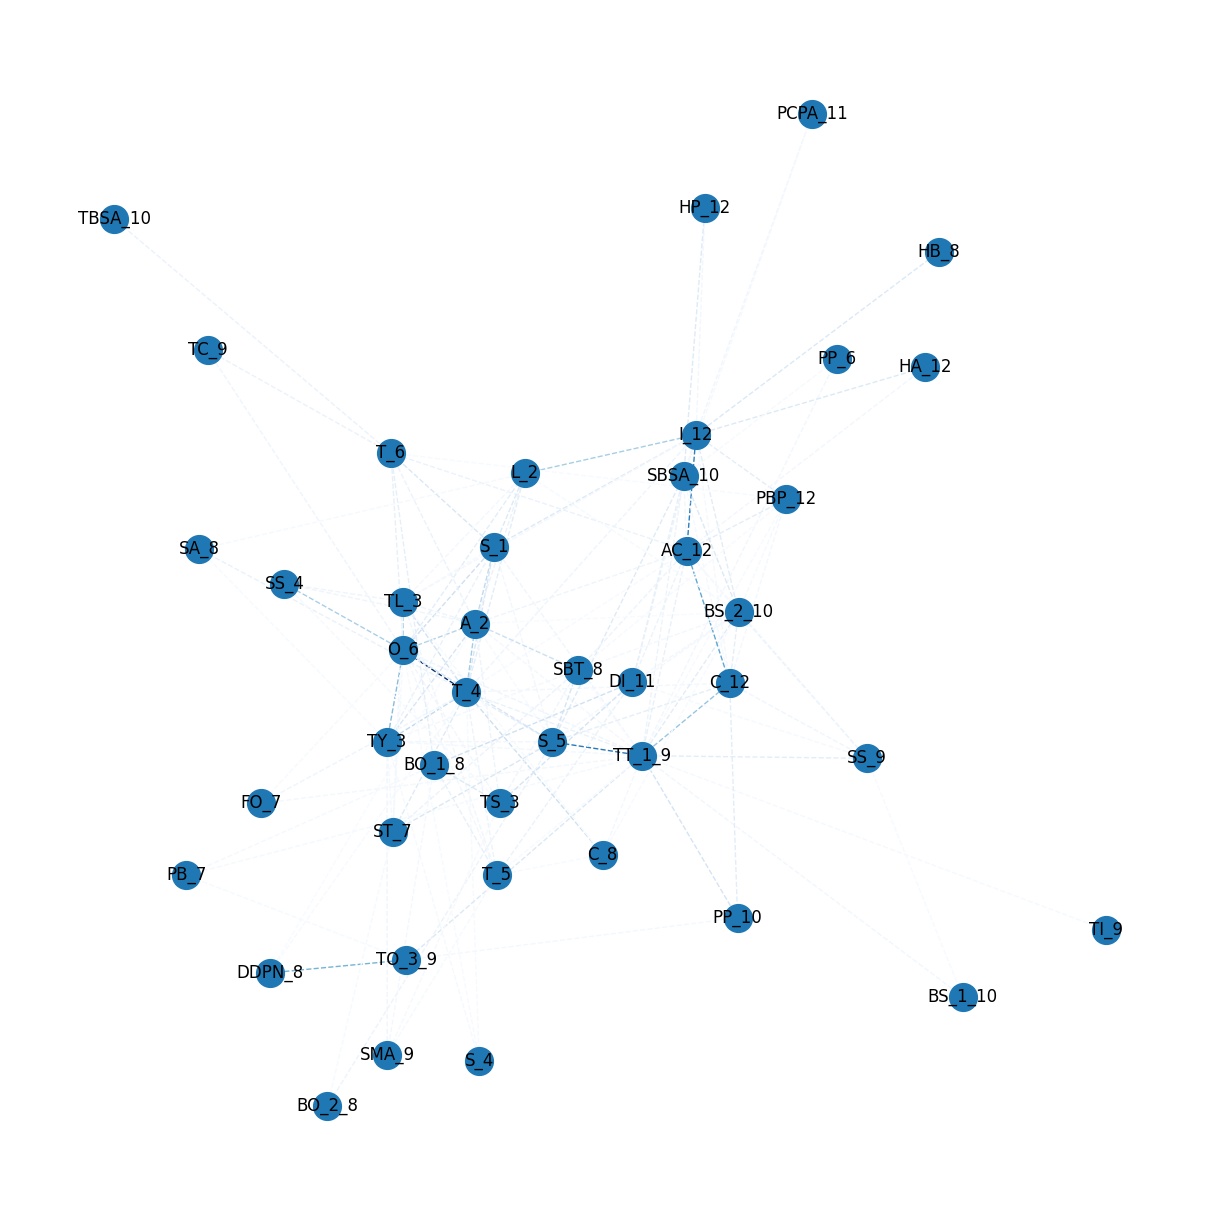

In [100]:
plot_graph(session,node_name='chemenv',weight_name='weight',node_size=400,font_size=12,edge_width=1,node_spacing=3, save=False)
# plot_graph(session,node_name='chemenv',weight_name='bond_order_sum',node_size=400,font_size=12,edge_width=1,node_spacing=3, save=False)

Relationship 1: Ni_AC_12 - Ni_I_12, Weight: 452.02001666666445
Relationship 2: Ni_I_12 - Ni_AC_12, Weight: 452.02001666666445
Relationship 3: Ga_TT_1_9 - Ga_SBSA_10, Weight: 184.0134937500003
Relationship 4: Ga_SBSA_10 - Ga_TT_1_9, Weight: 184.0134937500003
Relationship 5: Zn_SS_9 - Zn_H_11, Weight: 151.51336111111112
Relationship 6: Zn_H_11 - Zn_SS_9, Weight: 151.51336111111112
Relationship 7: Cu_I_12 - Cu_AC_12, Weight: 89.57052692307704
Relationship 8: Cu_AC_12 - Cu_I_12, Weight: 89.57052692307704
Relationship 9: F_TL_3 - F_A_2, Weight: 74.65038214285703
Relationship 10: F_A_2 - F_TL_3, Weight: 74.65038214285703
Relationship 11: F_S_1 - F_A_2, Weight: 74.11541426767671
Relationship 12: F_A_2 - F_S_1, Weight: 74.11541426767671
Relationship 13: Zn_TT_1_9 - Zn_H_11, Weight: 63.55315555555557
Relationship 14: Zn_H_11 - Zn_TT_1_9, Weight: 63.55315555555557
Relationship 15: Ni_I_12 - Ni_BS_2_10, Weight: 62.45003749999993
Relationship 16: Ni_BS_2_10 - Ni_I_12, Weight: 62.45003749999993
Rel

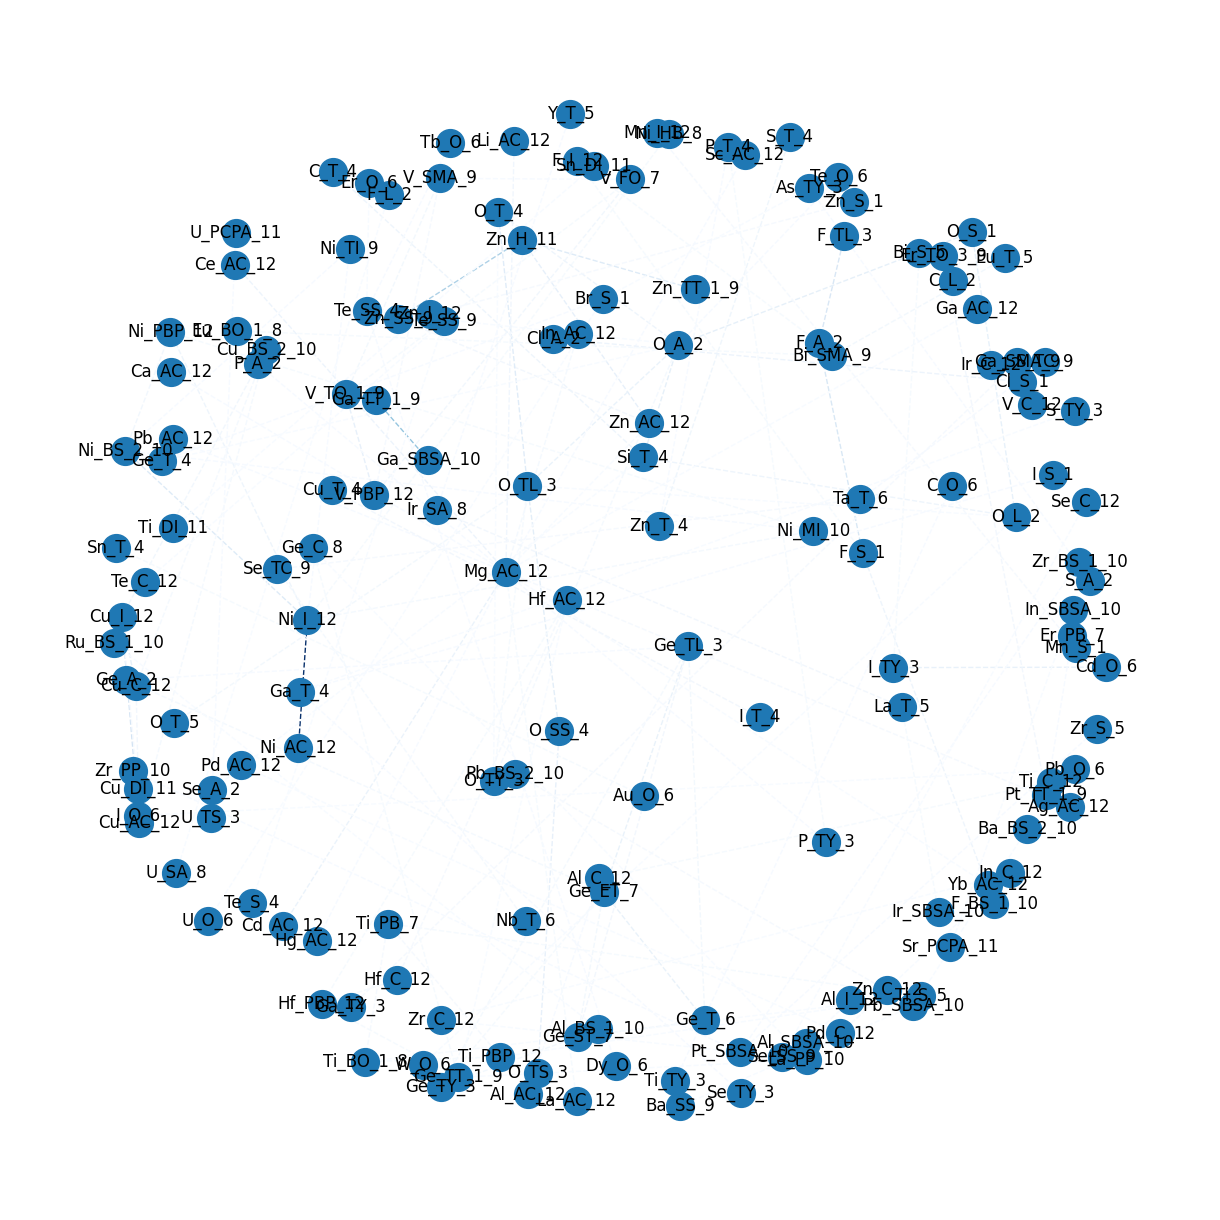

In [107]:
# plot_graph(session,node_name='chemenvElement',weight_name='weight',node_size=400,font_size=12,edge_width=1,node_spacing=5, save=False)
plot_graph(session,node_name='chemenvElement',weight_name='bond_order_sum',node_size=400,font_size=12,edge_width=1,node_spacing=2, save=False)

Relationship 1: O - Si, Weight: 73.19460659732756
Relationship 2: Si - O, Weight: 73.19460659732756
Relationship 3: I - Bi, Weight: 52.14756645202027
Relationship 4: Bi - I, Weight: 52.14756645202027
Relationship 5: La - Ir, Weight: 50.11324866071432
Relationship 6: Ir - La, Weight: 50.11324866071432
Relationship 7: Zr - Pt, Weight: 44.707377369280984
Relationship 8: Pt - Zr, Weight: 44.707377369280984
Relationship 9: Er - Pt, Weight: 41.177838194444256
Relationship 10: Pt - Er, Weight: 41.177838194444256
Relationship 11: Cd - I, Weight: 39.978146290604904
Relationship 12: I - Cd, Weight: 39.978146290604904
Relationship 13: Mg - Cd, Weight: 37.76120833333337
Relationship 14: Cd - Mg, Weight: 37.76120833333337
Relationship 15: Mg - Ce, Weight: 35.56007847503381
Relationship 16: Ce - Mg, Weight: 35.56007847503381
Relationship 17: O - Ti, Weight: 32.52787062819701
Relationship 18: Ti - O, Weight: 32.52787062819701
Relationship 19: Ba - Pb, Weight: 32.21561666666674
Relationship 20: Pb - B

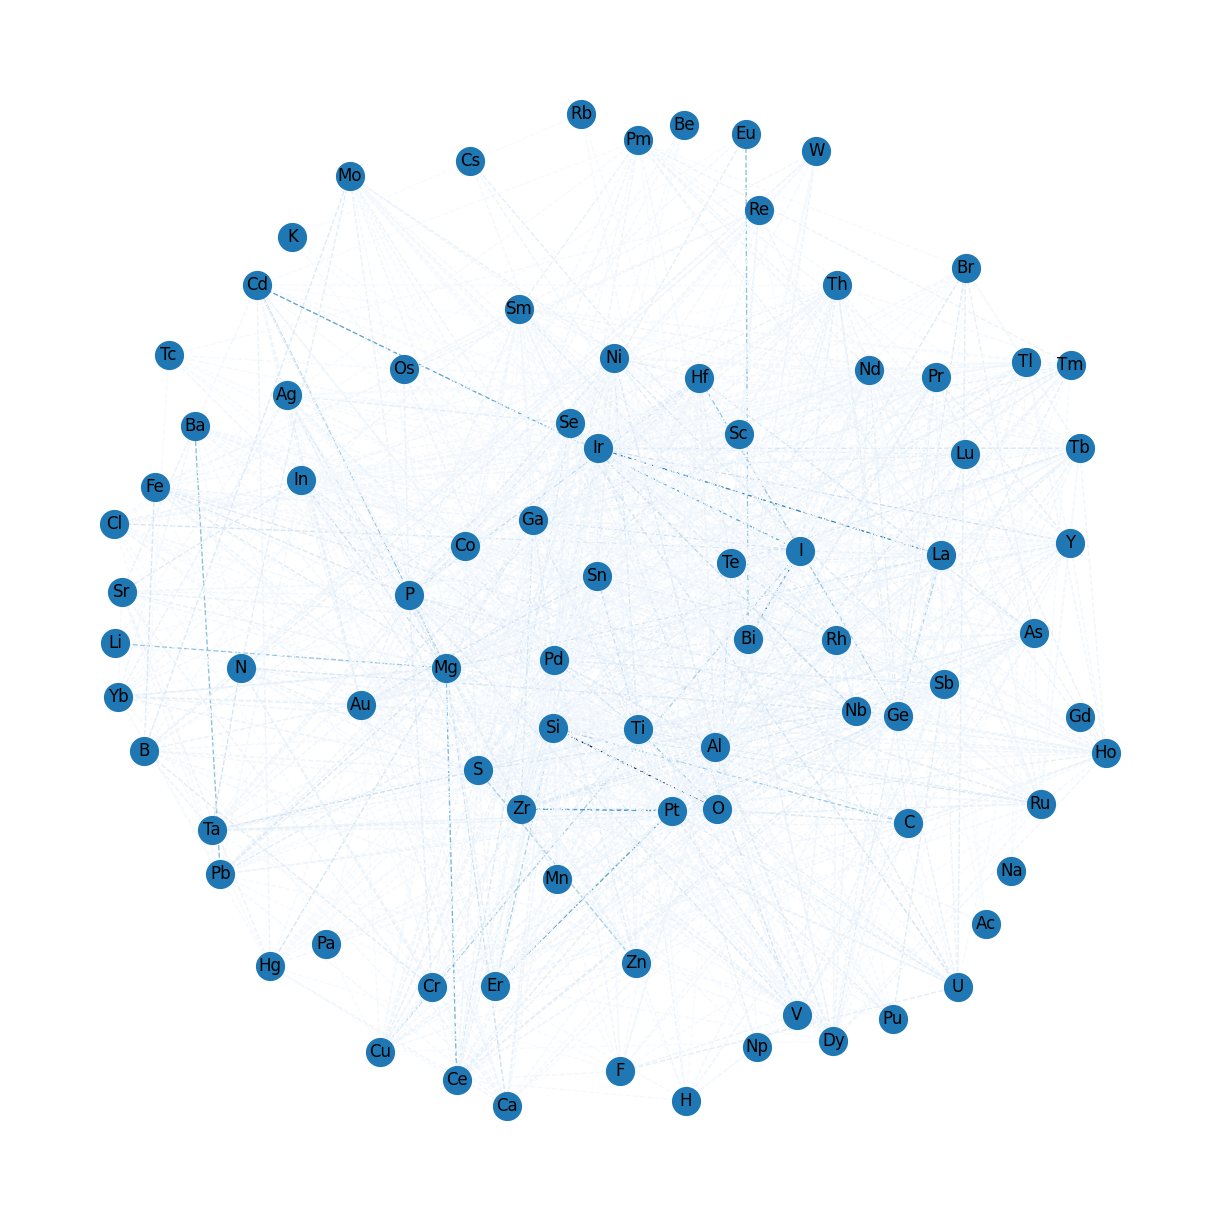

In [123]:
# plot_graph(session,node_name='Element',weight_name='weight',node_size=400,font_size=12,edge_width=1,node_spacing=2, save=False)
plot_graph(session,node_name='Element',weight_name='bond_order_sum',limit=2000,node_size=400,font_size=12,edge_width=1,node_spacing=4, save=False)